In [34]:
import mysql.connector as my  # Import the MySQL connector
from dotenv import load_dotenv
import os
# Load environment variables from .env file
load_dotenv()

# Fetch database credentials from environment variables
db_host = os.getenv("DB_HOST")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")

connection = my.connect(
    host=db_host,
    user=db_user,
    password=db_password,
    database=db_name
)

In [35]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [36]:
import pandas as pd
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')
 #After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
 cursor.description])
 # Query data from the 'product' table
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
 # Query data from the 'order_details' table
cursor.execute('SELECT * FROM orders')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
 #printing first 5 records from each table

In [37]:
print(customer_data.head())

  customer_id        name     city                  email    phone_no  \
0    CUST0001  Customer 1  Chicago  customer1@example.com  1785014047   
1    CUST0002  Customer 2  Phoenix  customer2@example.com  2882940227   
2    CUST0003  Customer 3  Houston  customer3@example.com  4062157789   
3    CUST0004  Customer 4  Chicago  customer4@example.com  8729546243   
4    CUST0005  Customer 5  Chicago  customer5@example.com  8135387695   

       address  pin_code  
0  996 Main St     20021  
1  441 Main St     53492  
2  187 Main St     30487  
3  156 Main St     76466  
4  591 Main St     23771  


In [38]:
print(product_data.head())

  product_id product_name        category sub_category  original_price  \
0   PROD0001    Product 1  Home & Kitchen   Appliances          915.81   
1   PROD0002    Product 2          Sports   Appliances          851.54   
2   PROD0003    Product 3           Books   Appliances          454.96   
3   PROD0004    Product 4          Sports    Equipment          104.46   
4   PROD0005    Product 5          Sports      Fiction          377.11   

   selling_price  stock  
0         888.64     10  
1         826.78     91  
2         420.03     56  
3          90.26     88  
4         364.15     49  


In [39]:
print(order_data.head())

   order_id customer_id product_id  quantity total_price      payment_mode  \
0         1    CUST0052   PROD0009         1      562.53       Credit Card   
1         2    CUST0093   PROD0037         8      789.12            PayPal   
2         3    CUST0015   PROD0033         1      867.09       Credit Card   
3         4    CUST0072   PROD0042         9     3485.25            PayPal   
4         5    CUST0061   PROD0044         6     3469.98  Cash on Delivery   

   order_date order_status  
0  2022-01-01      Pending  
1  2022-01-02      Pending  
2  2022-01-03      Shipped  
3  2022-01-04      Shipped  
4  2022-01-05    Cancelled  


Data Cleaning:

In [40]:
# Checkformissing values in each table.
print("\n Missing value in the customer data ")
print(customer_data.isnull().sum())
print("\n Missing value in the product data ")
print(product_data.isnull().sum())
print("\n Missing value in the order data ")
print(order_data.isnull().sum())


 Missing value in the customer data 
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

 Missing value in the product data 
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

 Missing value in the order data 
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [41]:
# 2. Ensuring Appropriate Data Types
print("\nData types in Customers Data:")
print(customer_data.dtypes)
print("\nData types in product Data:")
print(product_data.dtypes)
print("\nData types in order Data:")
print(order_data.dtypes)


Data types in Customers Data:
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object

Data types in product Data:
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object

Data types in order Data:
order_id         int64
customer_id     object
product_id      object
quantity         int64
total_price     object
payment_mode    object
order_date      object
order_status    object
dtype: object


 Exploratory Data Analysis (EDA) and Visualization:

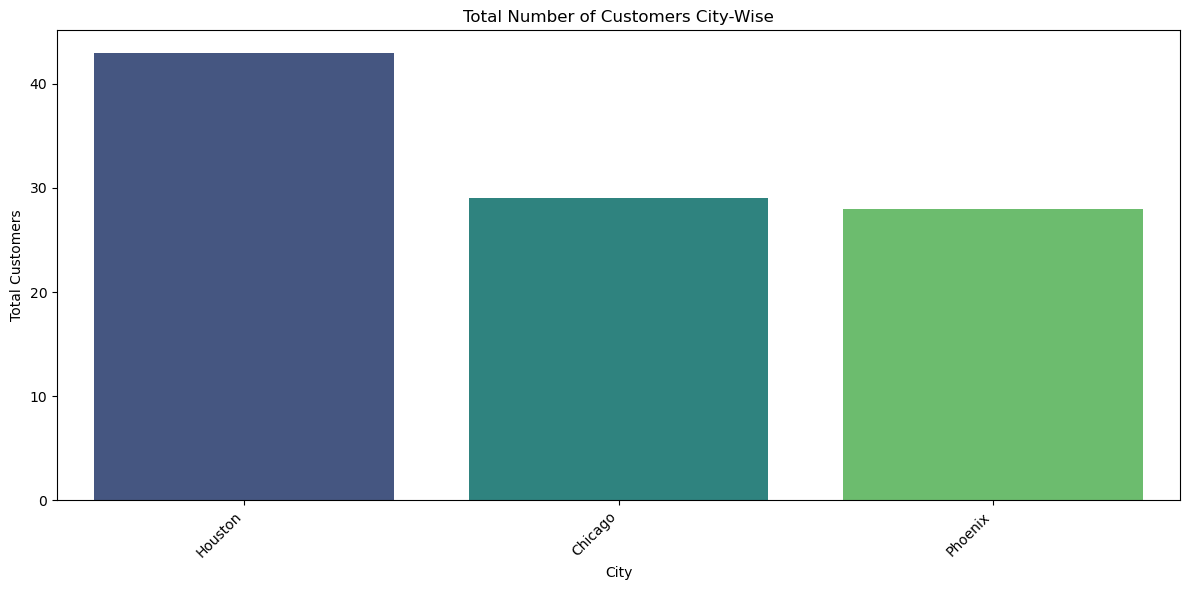

In [42]:
#  Customer Analysis:
#  ● Identify the total number of customers city wise.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Identify the total number of customers city-wise
city_wise_customers = customer_data.groupby('city')['customer_id'].nunique().reset_index()
city_wise_customers.columns = ['City', 'Total_Customers']

# Sort by the number of customers in descending order
city_wise_customers = city_wise_customers.sort_values(by='Total_Customers', ascending=False)

# Plotting the total number of customers city-wise
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='Total_Customers', data=city_wise_customers, palette='viridis')
plt.title('Total Number of Customers City-Wise')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Customers')
plt.xlabel('City')
plt.tight_layout()
plt.show()

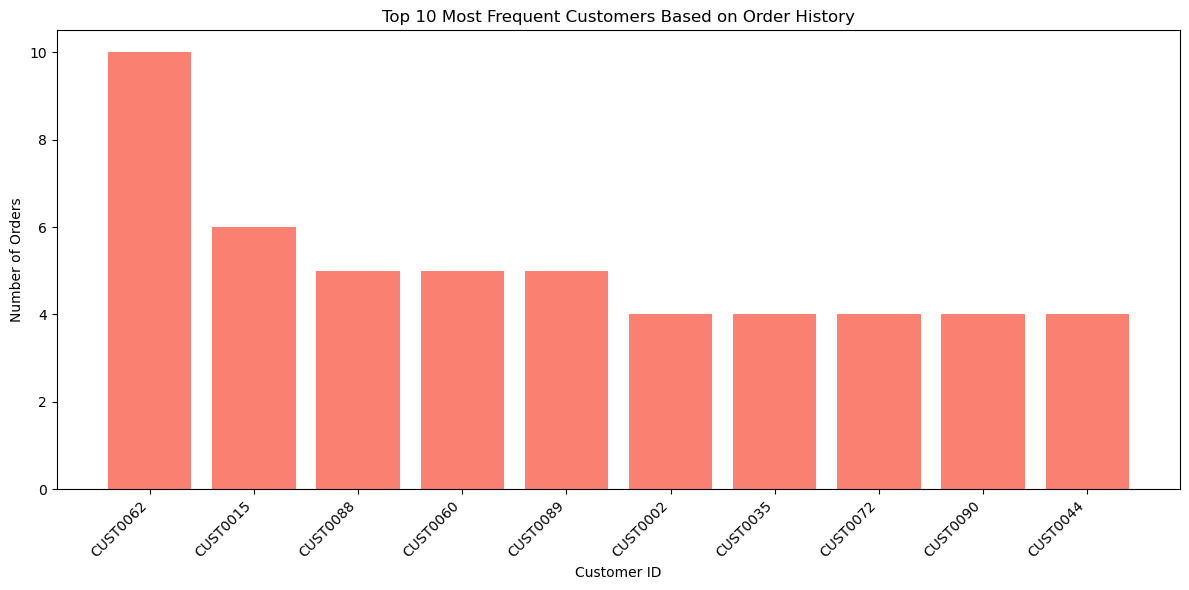

In [43]:

#  ● Identify the most frequent customers based on their order history
import matplotlib.pyplot as plt

# 1. Identify the most frequent customers based on their order history
frequent_customers = order_data.groupby('customer_id')['order_id'].count().reset_index()
frequent_customers.columns = ['Customer ID', 'Order Count']

# Sort by the number of orders in descending order
frequent_customers = frequent_customers.sort_values(by='Order Count', ascending=False)

# Select top 10 most frequent customers
top_frequent_customers = frequent_customers.head(10)

# Plotting using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(top_frequent_customers['Customer ID'], top_frequent_customers['Order Count'], color='salmon')

# Adding titles and labels
plt.title('Top 10 Most Frequent Customers Based on Order History')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')

# Rotate the x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot with tight layout for proper spacing
plt.tight_layout()
plt.show()


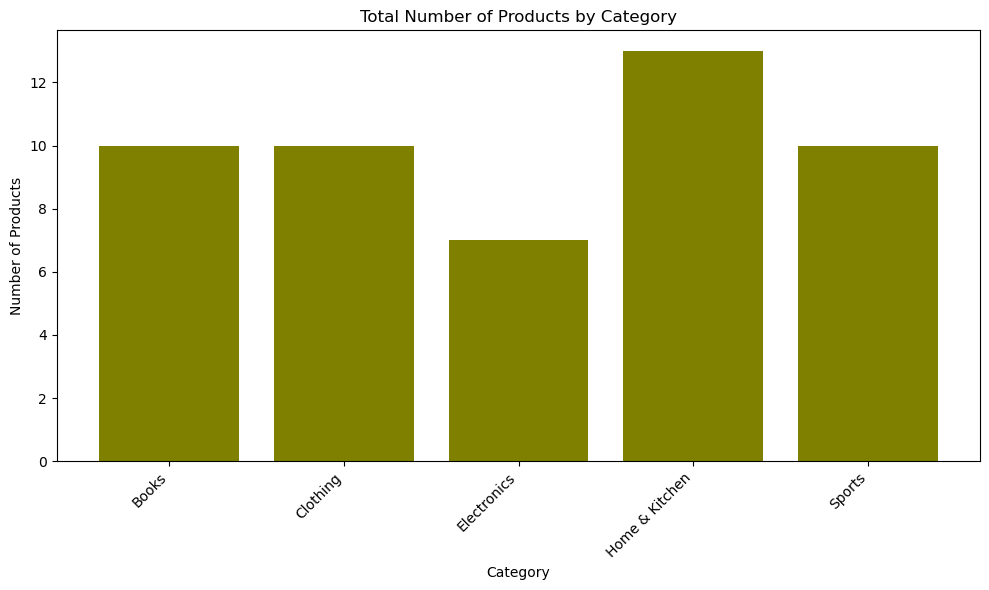

In [44]:
#  Product Analysis:
#  ● Determine the total number of products available by category.
import matplotlib.pyplot as plt

# Assuming 'products_df' contains product data

# 1. Determine the total number of products available by category
category_counts = product_data.groupby('category')['product_id'].count().reset_index()
category_counts.columns = ['Category', 'Product Count']

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Product Count'], color='olive')

# Adding titles and labels
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot with tight layout
plt.tight_layout()
plt.show()

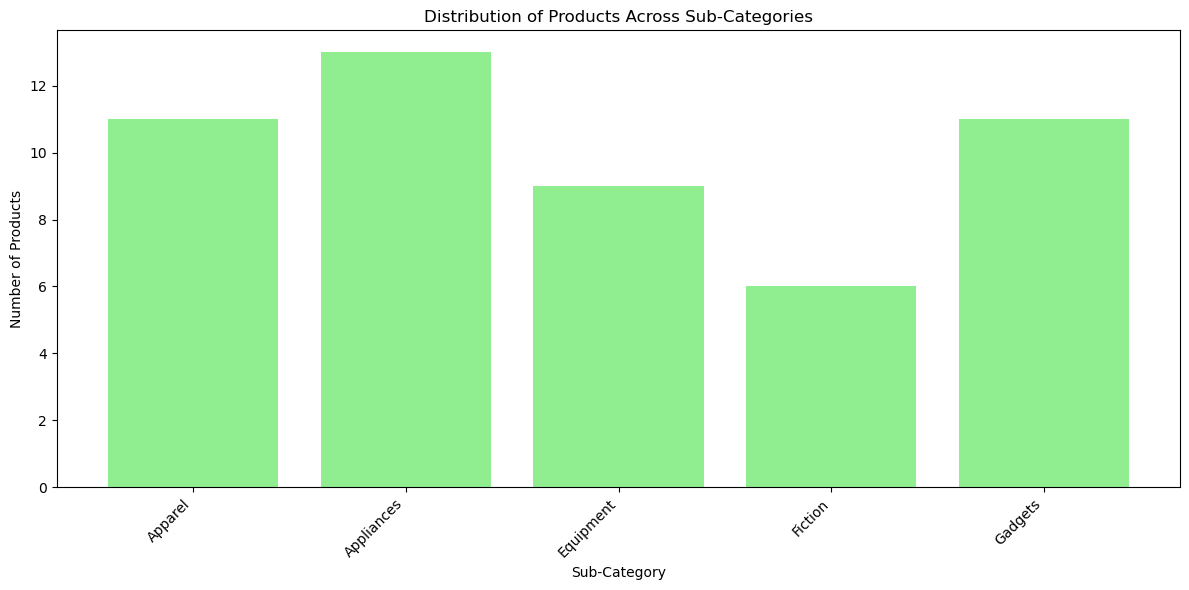

In [45]:

# 2. Analyze the distribution of products across sub-categories
subcategory_counts = product_data.groupby('sub_category')['product_id'].count().reset_index()
subcategory_counts.columns = ['Sub-Category', 'Product Count']

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(subcategory_counts['Sub-Category'], subcategory_counts['Product Count'], color='lightgreen')

# Adding titles and labels
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot with tight layout
plt.tight_layout()
plt.show()


In [46]:

# 3. Identify products with low stock levels
low_stock_threshold = 10
low_stock_products = product_data[product_data['stock'] < low_stock_threshold]

print("Products with low stock levels:")
print(low_stock_products[['product_id', 'product_name', 'stock']])


Products with low stock levels:
   product_id product_name  stock
10   PROD0011   Product 11      6
14   PROD0015   Product 15      1
15   PROD0016   Product 16      0
21   PROD0022   Product 22      8
26   PROD0027   Product 27      2


In [47]:

# 4. Calculate the average, maximum, and minimum prices for products
avg_price = product_data['selling_price'].mean()
max_price = product_data['selling_price'].max()
min_price = product_data['selling_price'].min()

print(f"Average Selling Price: {avg_price}")
print(f"Maximum Selling Price: {max_price}")
print(f"Minimum Selling Price: {min_price}")


Average Selling Price: 461.10940000000005
Maximum Selling Price: 958.89
Minimum Selling Price: -36.57


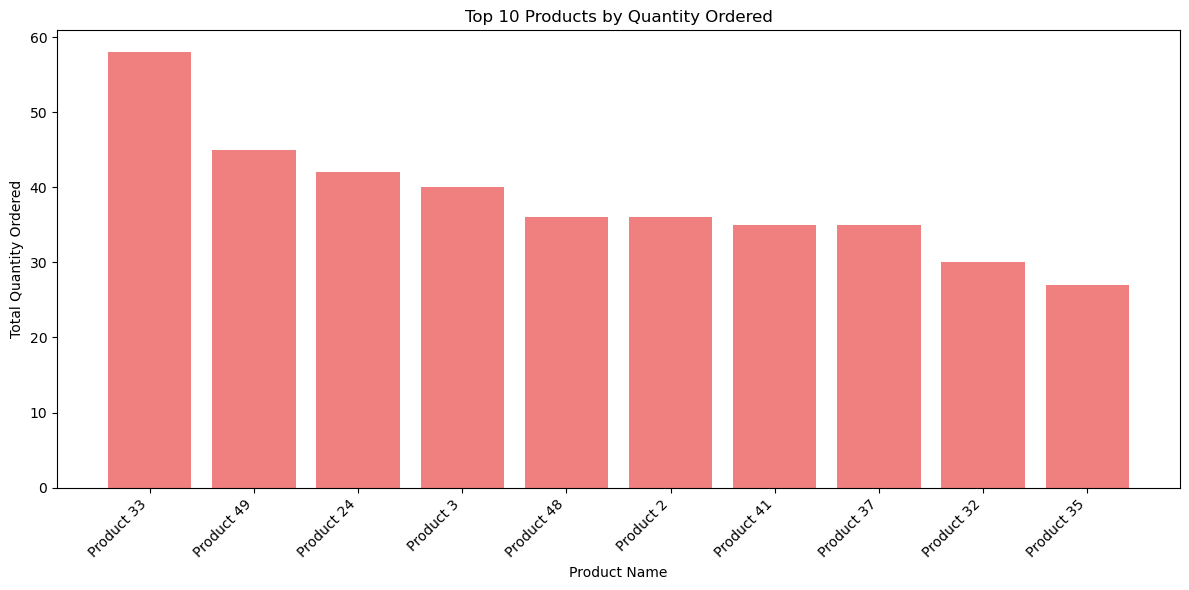

In [48]:
# Order Analysis:
import matplotlib.pyplot as plt

# Assuming 'orders_df' contains order data and 'products_df' contains product data

# 1. Calculate the top 10 orders product wise (by total quantity ordered)
top_10_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
top_10_products = top_10_products.sort_values(by='quantity', ascending=False).head(10)

# Merging to get product names
top_10_products = pd.merge(top_10_products, product_data[['product_id', 'product_name']], on='product_id')

# Plotting the top 10 products by quantity ordered
plt.figure(figsize=(12, 6))
plt.bar(top_10_products['product_name'], top_10_products['quantity'], color='lightcoral')

# Adding titles and labels
plt.title('Top 10 Products by Quantity Ordered')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot with tight layout
plt.tight_layout()
plt.show()


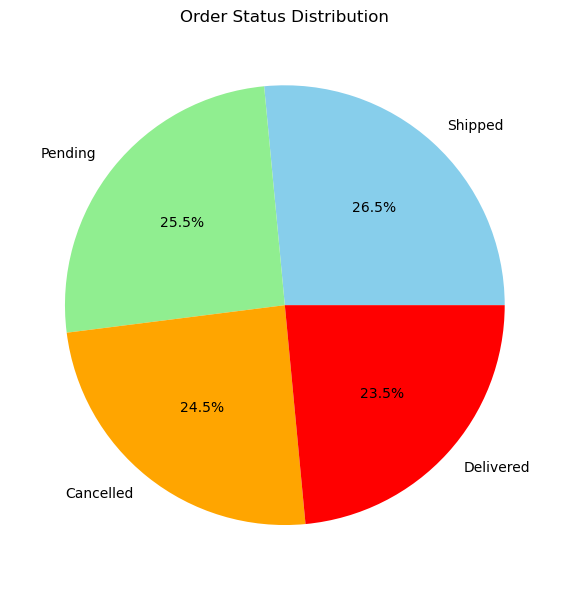

In [49]:
# 2. Analyze the order status distribution
order_status_distribution = order_data['order_status'].value_counts().reset_index()
order_status_distribution.columns = ['Order Status', 'Count']

# Plotting the order status distribution
plt.figure(figsize=(8, 6))
plt.pie(order_status_distribution['Count'], labels=order_status_distribution['Order Status'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'red'])

# Adding a title
plt.title('Order Status Distribution')

# Show plot with tight layout
plt.tight_layout()
plt.show()


In [50]:
# 3. Identify the most popular products based on order quantity
most_popular_products = order_data.groupby('product_id')['quantity'].sum().reset_index()
most_popular_products = most_popular_products.sort_values(by='quantity', ascending=False).head(10)

# Merging to get product names
most_popular_products = pd.merge(most_popular_products, product_data[['product_id', 'product_name']], on='product_id')

# Displaying the most popular products
print("Most Popular Products (by Quantity Ordered):")
print(most_popular_products[['product_name', 'quantity']])


Most Popular Products (by Quantity Ordered):
  product_name  quantity
0   Product 33        58
1   Product 49        45
2   Product 24        42
3    Product 3        40
4   Product 48        36
5    Product 2        36
6   Product 41        35
7   Product 37        35
8   Product 32        30
9   Product 35        27


In [51]:
#  <!-- Sales Analysis:
#  ● Calculate total revenue generated from orders product wise.
#  ● Calculate the total revenue generated from all orders
#  ● Calculate total revenue product category wise percentage.
#  ● Analyzethe performance of different product categories in terms of sales.
#  ● Identify the most profitable products based on the difference between
#  original and selling prices. -->

In [52]:
# 1. Calculate total revenue generated from orders product wise
# Merging the orders_df with products_df to get selling_price
orders_with_prices = pd.merge(order_data, product_data[['product_id', 'selling_price']], on='product_id')

# Calculating total revenue for each product (quantity * selling_price)
orders_with_prices['total_revenue'] = orders_with_prices['quantity'] * orders_with_prices['selling_price']

# Group by product_id to get total revenue per product
revenue_product_wise = orders_with_prices.groupby('product_id')['total_revenue'].sum().reset_index()

# Merging with product names for better readability
revenue_product_wise = pd.merge(revenue_product_wise, product_data[['product_id', 'product_name']], on='product_id')

# Display top 10 products by revenue
print("Total Revenue Generated from Orders (Product Wise):")
print(revenue_product_wise[['product_name', 'total_revenue']].sort_values(by='total_revenue', ascending=False).head(10))


Total Revenue Generated from Orders (Product Wise):
   product_name  total_revenue
30   Product 33       48283.26
1     Product 2       29764.08
27   Product 30       24194.56
21   Product 24       22706.04
29   Product 32       20214.00
42   Product 46       17428.50
37   Product 40       16827.80
2     Product 3       16801.20
19   Product 22       16429.87
34   Product 37       15875.30


In [53]:
# 2. Calculate the total revenue generated from all orders
total_revenue_all_orders = orders_with_prices['total_revenue'].sum()

print(f"Total Revenue Generated from All Orders: ${total_revenue_all_orders:.2f}")


Total Revenue Generated from All Orders: $464752.69


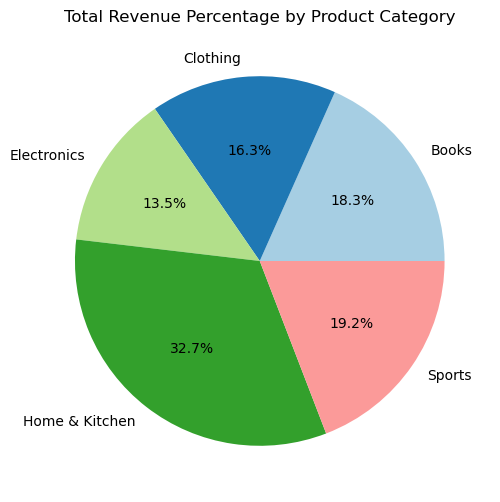

         category  total_revenue  percentage
0           Books       85228.53   18.338469
1        Clothing       75613.60   16.269642
2     Electronics       62871.46   13.527939
3  Home & Kitchen      152030.54   32.712138
4          Sports       89008.56   19.151812


In [54]:
# 3. Calculate total revenue product category wise percentage
# Merging with products_df to get categories
orders_with_category = pd.merge(orders_with_prices, product_data[['product_id', 'category']], on='product_id')

# Grouping by category to get total revenue for each category
revenue_category_wise = orders_with_category.groupby('category')['total_revenue'].sum().reset_index()

# Calculating percentage contribution of each category
revenue_category_wise['percentage'] = (revenue_category_wise['total_revenue'] / total_revenue_all_orders) * 100

# Plotting the revenue category wise percentage
plt.figure(figsize=(10, 6))
plt.pie(revenue_category_wise['total_revenue'], labels=revenue_category_wise['category'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Adding a title
plt.title('Total Revenue Percentage by Product Category')

# Show plot
plt.show()

# Display category-wise revenue and percentage
print(revenue_category_wise)


In [55]:
# 4. Analyze the performance of different product categories in terms of sales
# Sorting by total revenue to see performance
category_performance = revenue_category_wise.sort_values(by='total_revenue', ascending=False)

print("Product Category Performance (by Total Sales Revenue):")
print(category_performance)


Product Category Performance (by Total Sales Revenue):
         category  total_revenue  percentage
3  Home & Kitchen      152030.54   32.712138
4          Sports       89008.56   19.151812
0           Books       85228.53   18.338469
1        Clothing       75613.60   16.269642
2     Electronics       62871.46   13.527939


In [56]:
# 5. Identify the most profitable products based on the difference between original and selling prices
# Calculating profit margin (selling_price - original_price)
product_data['profit_margin'] = product_data['selling_price'] - product_data['original_price']

# Merging with orders to calculate total profit for each product (quantity * profit_margin)
orders_with_profits = pd.merge(order_data, product_data[['product_id', 'product_name', 'profit_margin']], on='product_id')
orders_with_profits['total_profit'] = orders_with_profits['quantity'] * orders_with_profits['profit_margin']

# Grouping by product_id to get total profit for each product
profit_product_wise = orders_with_profits.groupby('product_id')['total_profit'].sum().reset_index()

# Merging with product names for better readability
profit_product_wise = pd.merge(profit_product_wise, product_data[['product_id', 'product_name']], on='product_id')

# Sorting by total profit to identify the most profitable products
most_profitable_products = profit_product_wise.sort_values(by='total_profit', ascending=False).head(10)

# Display the most profitable products
print("Most Profitable Products:")
print(most_profitable_products[['product_name', 'total_profit']])


Most Profitable Products:
   product_name  total_profit
17   Product 20        -52.40
12   Product 15        -57.82
25   Product 28        -99.20
31   Product 34       -102.70
11   Product 14       -143.60
5     Product 6       -148.00
6     Product 7       -152.36
42   Product 46       -154.17
10   Product 12       -157.20
41   Product 45       -162.72


In [57]:
#  Customer Order Patterns:
#  ● Identify product names with the highest and lowest order quantities.
#  ● Identify customers with the highest and lowest order quantities by
#  customer name.
#  ● Determine the most preferred payment modes

In [58]:
# Grouping by product_id to sum the quantities
product_order_quantities = order_data.groupby('product_id')['quantity'].sum().reset_index()

# Merging with product names for better readability
product_order_quantities = pd.merge(product_order_quantities, product_data[['product_id', 'product_name']], on='product_id')

# Identifying the product with the highest and lowest order quantities
most_ordered_product = product_order_quantities.loc[product_order_quantities['quantity'].idxmax()]
least_ordered_product = product_order_quantities.loc[product_order_quantities['quantity'].idxmin()]

# Display the most and least ordered product
print("Product with the Highest Order Quantity:")
print(most_ordered_product[['product_name', 'quantity']])

print("\nProduct with the Lowest Order Quantity:")
print(least_ordered_product[['product_name', 'quantity']])


Product with the Highest Order Quantity:
product_name    Product 33
quantity                58
Name: 30, dtype: object

Product with the Lowest Order Quantity:
product_name    Product 14
quantity                 4
Name: 11, dtype: object


In [59]:
# Grouping by customer_id to sum the quantities
customer_order_quantities = order_data.groupby('customer_id')['quantity'].sum().reset_index()


# Merging with customer names for better readability
# Replace 'customer_name' with the correct column name based on the print output
customer_order_quantities = pd.merge(customer_order_quantities, customer_data[['customer_id', 'name']], on='customer_id')

# Identifying the customer with the highest and lowest order quantities
most_frequent_customer = customer_order_quantities.loc[customer_order_quantities['quantity'].idxmax()]
least_frequent_customer = customer_order_quantities.loc[customer_order_quantities['quantity'].idxmin()]

# Display the most and least frequent customers
print("Customer with the Highest Order Quantity:")
print(most_frequent_customer[['name', 'quantity']])

print("\nCustomer with the Lowest Order Quantity:")
print(least_frequent_customer[['name', 'quantity']])


Customer with the Highest Order Quantity:
name        Customer 62
quantity             50
Name: 52, dtype: object

Customer with the Lowest Order Quantity:
name        Customer 26
quantity              1
Name: 19, dtype: object


In [60]:
# Counting the occurrences of each payment mode
payment_mode_counts = order_data['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['payment_mode', 'count']

# Identifying the most and least preferred payment modes
most_preferred_payment_mode = payment_mode_counts.iloc[0]
least_preferred_payment_mode = payment_mode_counts.iloc[-1]

# Display the most and least preferred payment modes
print("Most Preferred Payment Mode:")
print(most_preferred_payment_mode)

print("\nLeast Preferred Payment Mode:")
print(least_preferred_payment_mode)


Most Preferred Payment Mode:
payment_mode    PayPal
count               71
Name: 0, dtype: object

Least Preferred Payment Mode:
payment_mode    Credit Card
count                    61
Name: 2, dtype: object


In [61]:
# Time-based Analysis:
#  ● Monthwisetotal sales.
#  ● Monthandyearwisetotal sales
#  ● Identify peak order date.

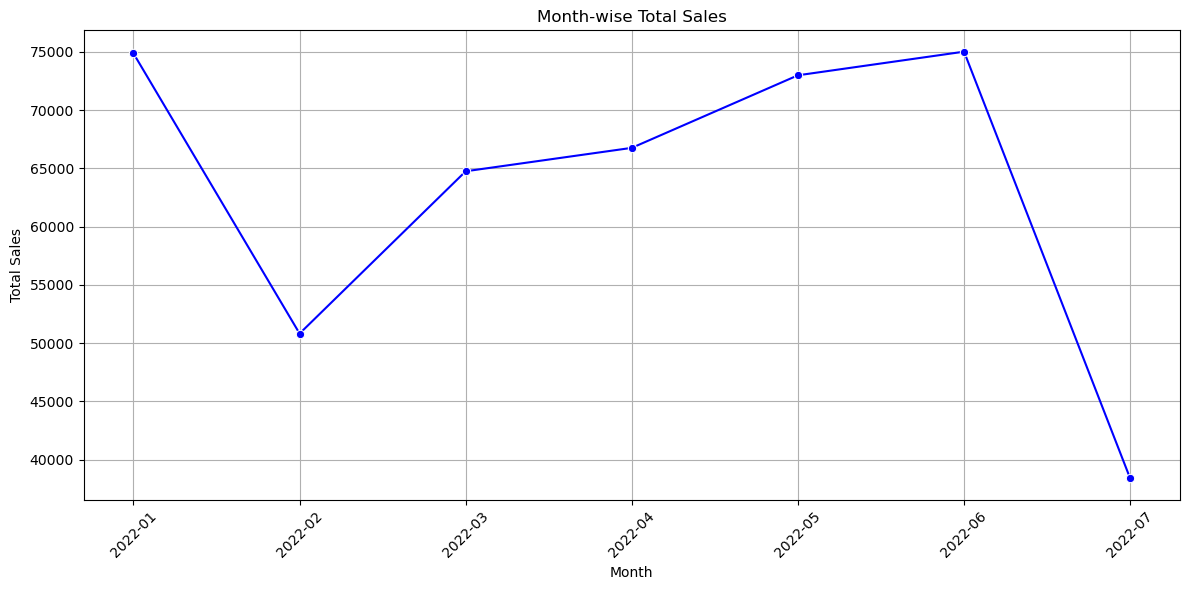

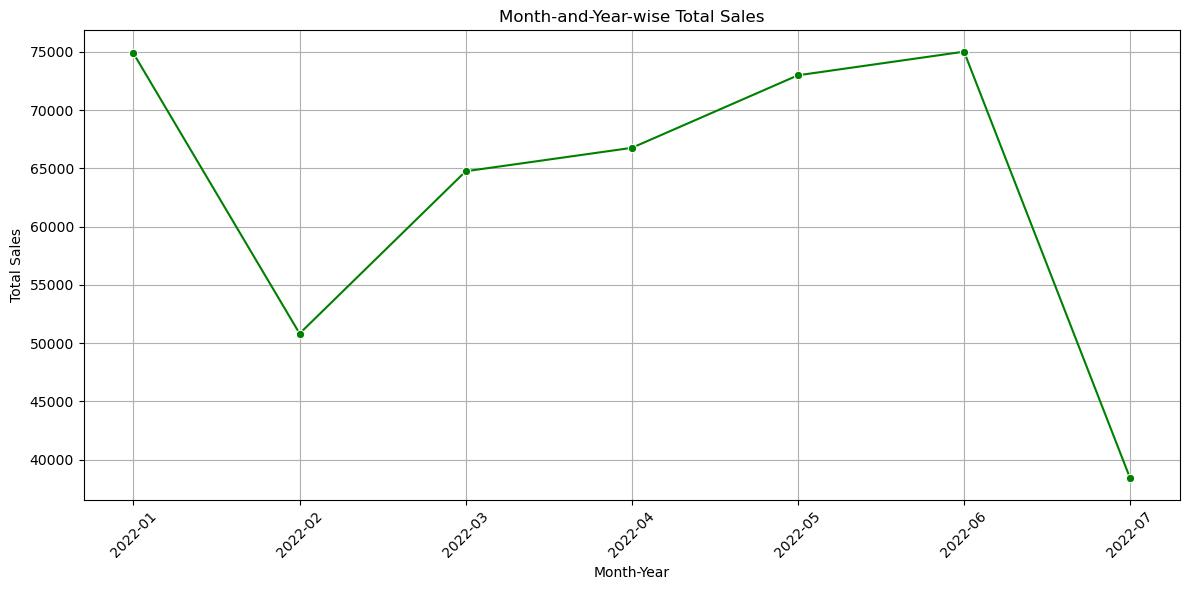

Peak Order Date: 2022-01-01 00:00:00
Number of Orders on Peak Date: 1


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'order_date' to datetime format
order_data['order_date'] = pd.to_datetime(order_data['order_date'])

# Add columns for month and year
order_data['month'] = order_data['order_date'].dt.to_period('M')
order_data['year_month'] = order_data['order_date'].dt.to_period('M').astype(str)

# Month-wise Total Sales
monthwise_sales = order_data.groupby('month')['total_price'].sum().reset_index()
monthwise_sales['month'] = monthwise_sales['month'].astype(str)

# Plot Month-wise Total Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthwise_sales, x='month', y='total_price', marker='o', color='b')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Month-and-Year-wise Total Sales
month_yearwise_sales = order_data.groupby('year_month')['total_price'].sum().reset_index()

# Plot Month-and-Year-wise Total Sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_yearwise_sales, x='year_month', y='total_price', marker='o', color='g')
plt.title('Month-and-Year-wise Total Sales')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify Peak Order Date
peak_order_date = order_data['order_date'].value_counts().idxmax()
peak_order_count = order_data['order_date'].value_counts().max()

print(f"Peak Order Date: {peak_order_date}")
print(f"Number of Orders on Peak Date: {peak_order_count}")



In [63]:
# Geographical Analysis:
#  ● Explore the distribution of customers across different cities.
# ● Analyzewhether certain products or categories are more popular in a specific city.

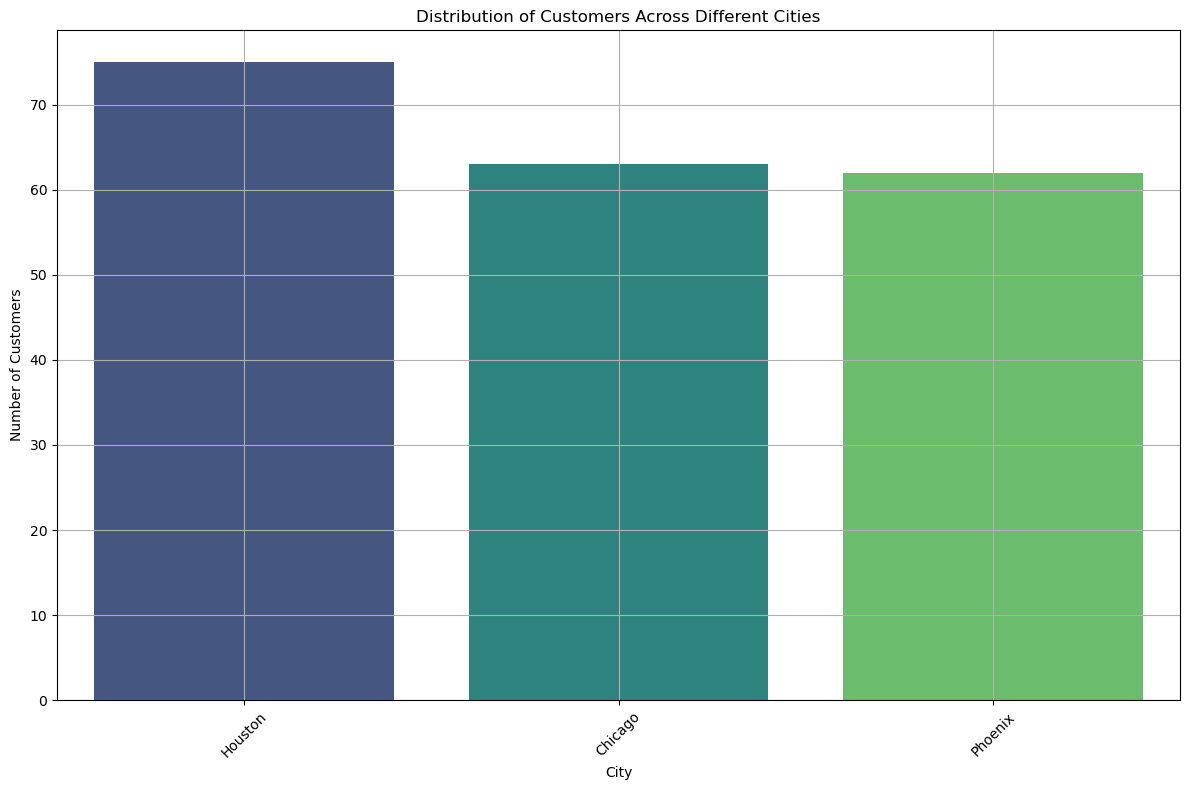

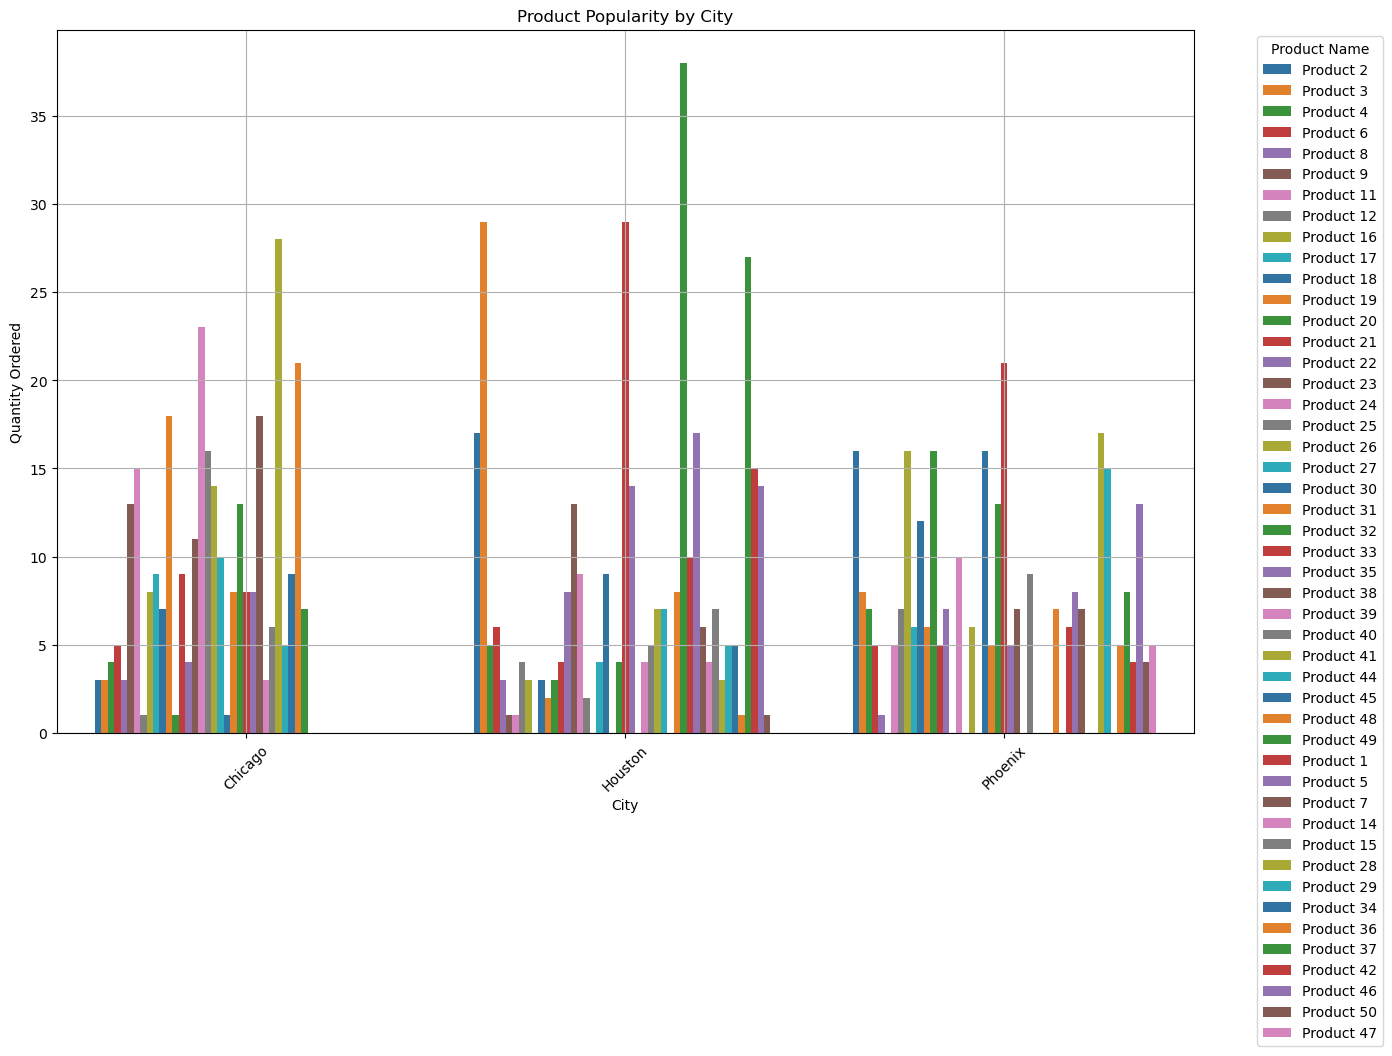

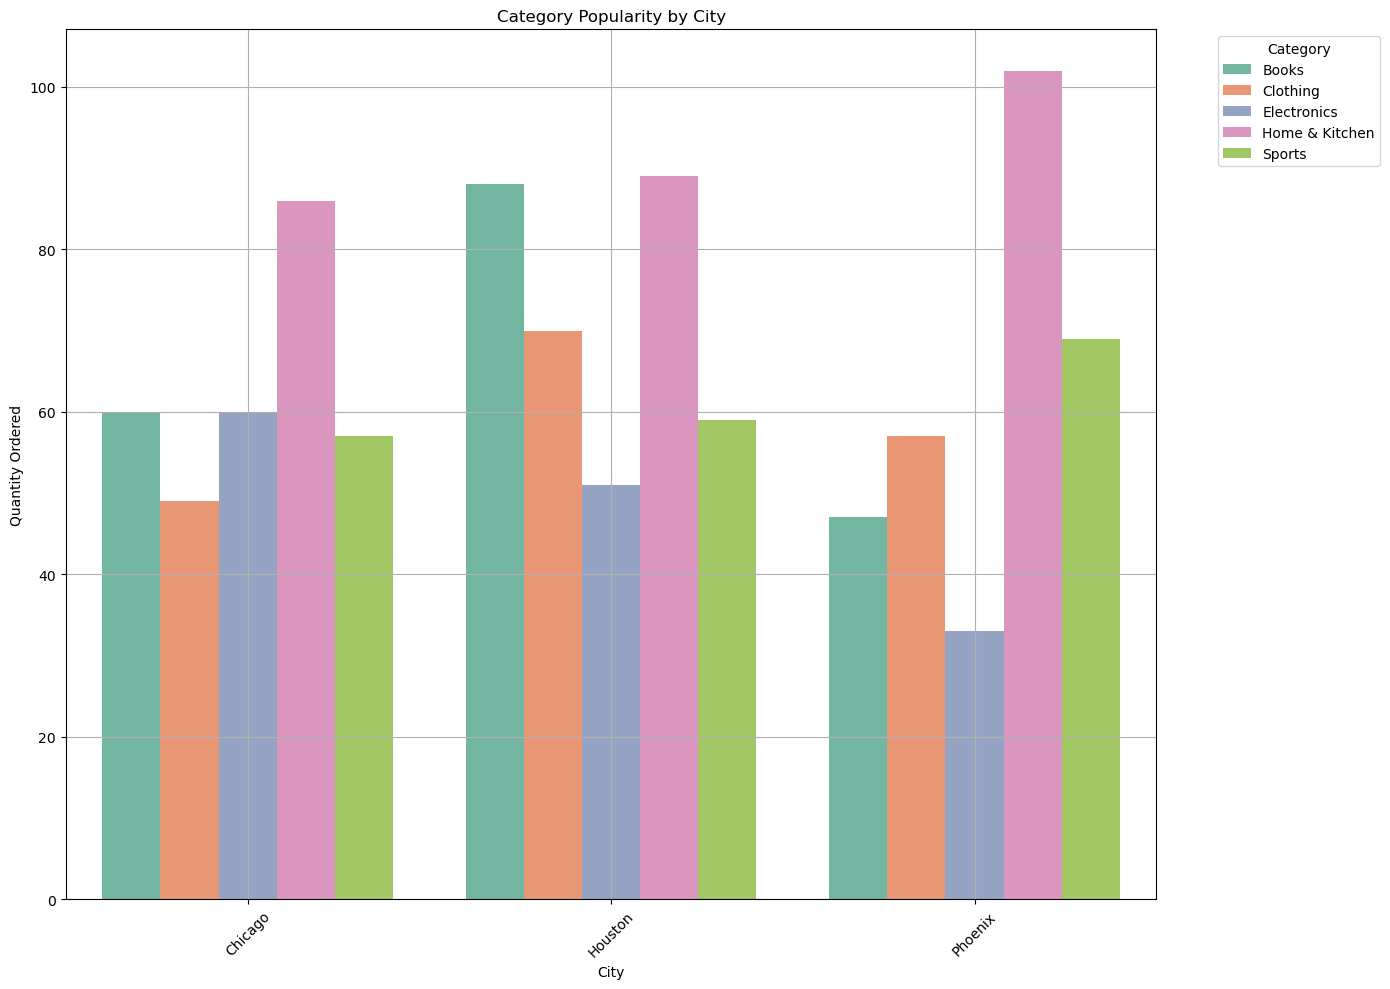

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is correctly set up with 'city', 'product_id', 'category', and 'quantity'
merged_df = pd.merge(order_data, customer_data[['customer_id', 'city']], on='customer_id')

# Merge with product data to get product categories
merged_df = pd.merge(merged_df, product_data[['product_id', 'category']], on='product_id')


# 1. Distribution of Customers Across Different Cities
city_distribution = merged_df['city'].value_counts().reset_index()
city_distribution.columns = ['city', 'number_of_customers']

# Plot distribution of customers across cities
plt.figure(figsize=(12, 8))
sns.barplot(data=city_distribution, x='city', y='number_of_customers', palette='viridis')
plt.title('Distribution of Customers Across Different Cities')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Product Popularity by City
# Aggregate order quantities by city and product
city_product_popularity = merged_df.groupby(['city', 'product_id'])['quantity'].sum().reset_index()

# Merge with product data to get product names
city_product_popularity = pd.merge(city_product_popularity, product_data[['product_id', 'product_name']], on='product_id')

# Plot popularity of products by city
plt.figure(figsize=(14, 10))
sns.barplot(data=city_product_popularity, x='city', y='quantity', hue='product_name', palette='tab10')
plt.title('Product Popularity by City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Product Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Category Popularity by City
# Aggregate order quantities by city and category
city_category_popularity = merged_df.groupby(['city', 'category'])['quantity'].sum().reset_index()

# Plot popularity of categories by city
plt.figure(figsize=(14, 10))
sns.barplot(data=city_category_popularity, x='city', y='quantity', hue='category', palette='Set2')
plt.title('Category Popularity by City')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [65]:
#  Product Performance:
#  ● Identify the top 10 best-selling products.
#  ● Identify top 10 slow-moving products based on low sales

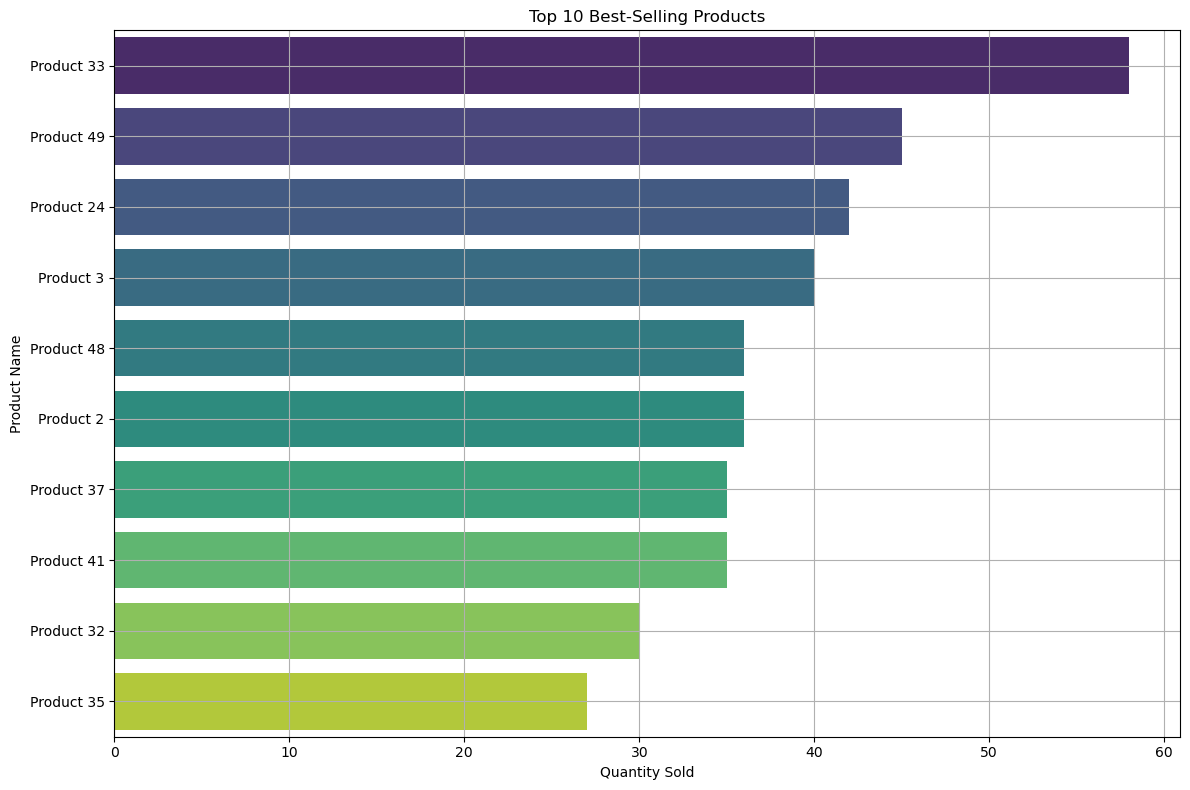

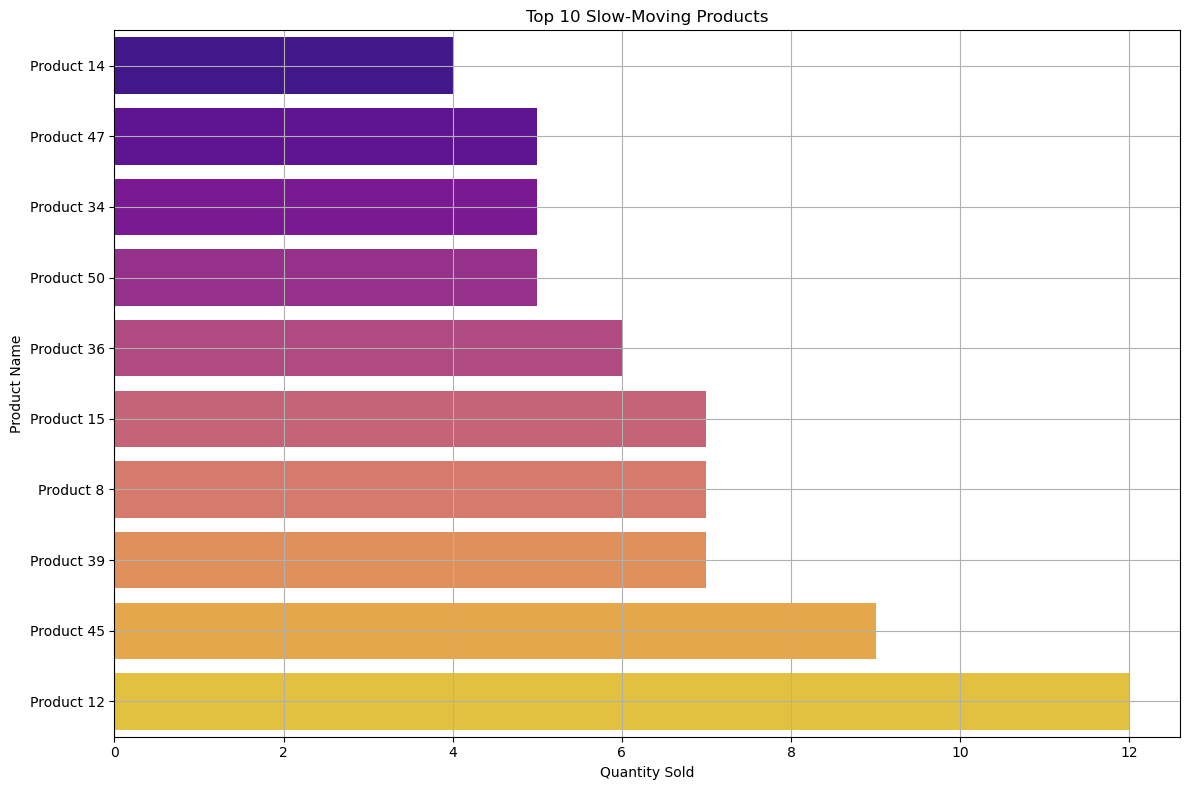

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data Preparation
# orders_df = pd.read_csv('path_to_your_orders_data.csv') # Load your order data
# product_data = pd.read_csv('path_to_your_product_data.csv') # Load your product data

# Merge orders data with product data to get product details
merged_df = pd.merge(order_data, product_data[['product_id', 'product_name']], on='product_id')

# Aggregate sales quantities by product
product_sales = merged_df.groupby('product_name')['quantity'].sum().reset_index()

# Sort products by sales quantity
top_selling_products = product_sales.sort_values(by='quantity', ascending=False).head(10)
slow_moving_products = product_sales.sort_values(by='quantity').head(10)

# Plot Top 10 Best-Selling Products
plt.figure(figsize=(12, 8))
sns.barplot(data=top_selling_products, x='quantity', y='product_name', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Top 10 Slow-Moving Products
plt.figure(figsize=(12, 8))
sns.barplot(data=slow_moving_products, x='quantity', y='product_name', palette='plasma')
plt.title('Top 10 Slow-Moving Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Sample Data Preparation
# orders_df = pd.read_csv('path_to_your_orders_data.csv') # Load your order data

# Identify repeat customers
repeat_customers = order_data.groupby('customer_id')['order_id'].count().reset_index()
repeat_customers.columns = ['customer_id', 'order_count']

# Filter customers who made more than one purchase
repeat_customers = repeat_customers[repeat_customers['order_count'] > 1]

# Merge with customer details for better readability (if you have customer data)
# customer_data = pd.read_csv('path_to_your_customer_data.csv') # Load your customer data
# repeat_customers = pd.merge(repeat_customers, customer_data[['customer_id', 'customer_name']], on='customer_id')

# Display repeat customers and their order patterns
print(repeat_customers.head())

# Analyzing their order patterns
# For example, you can check the average order quantity for repeat customers
repeat_customer_orders = order_data[order_data['customer_id'].isin(repeat_customers['customer_id'])]
repeat_customer_patterns = repeat_customer_orders.groupby('customer_id')['quantity'].agg(['mean', 'sum']).reset_index()
repeat_customer_patterns.columns = ['customer_id', 'average_quantity', 'total_quantity']

# Display order patterns
print(repeat_customer_patterns.head())


  customer_id  order_count
0    CUST0001            3
1    CUST0002            4
2    CUST0003            4
3    CUST0004            4
4    CUST0005            2
  customer_id  average_quantity  total_quantity
0    CUST0001          7.333333              22
1    CUST0002          5.250000              21
2    CUST0003          4.500000              18
3    CUST0004          6.000000              24
4    CUST0005          4.500000               9


In [68]:
#  Payment Analysis:
#  ● Display successful and pending payments order counts.

Payment Status Counts:
       payment_mode  count
0            PayPal     71
1  Cash on Delivery     68
2       Credit Card     61


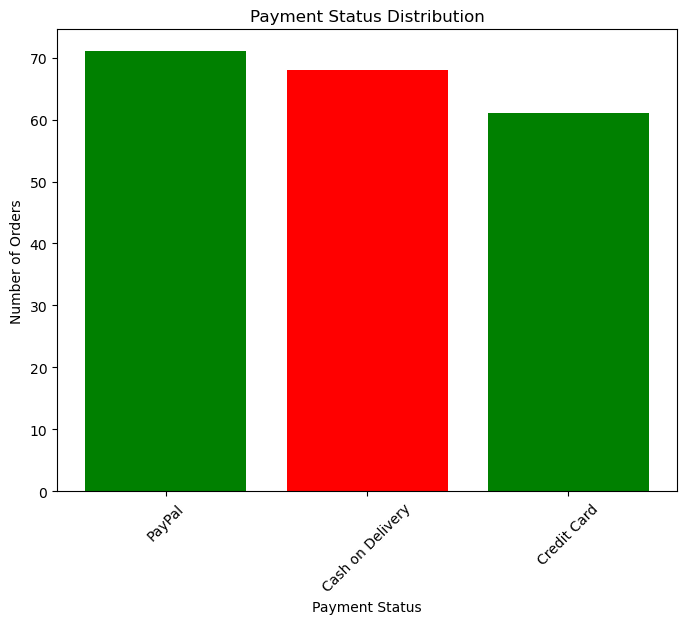

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame structure based on the provided table
# Assuming 'order_data' DataFrame already exists with 'payment_status' column

# 1. Group Orders by Payment Status
payment_counts = order_data['payment_mode'].value_counts().reset_index()
payment_counts.columns = ['payment_mode', 'count']

# 2. Display the Counts
print("Payment Status Counts:")
print(payment_counts)

# 3. Plot the Payment Status Counts
plt.figure(figsize=(8, 6))
plt.bar(payment_counts['payment_mode'], payment_counts['count'], color=['green', 'red'])
plt.xlabel('Payment Status')
plt.ylabel('Number of Orders')
plt.title('Payment Status Distribution')
plt.xticks(rotation=45)
plt.show()
